In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
merged=pd.read_csv('/Feb17NoNull_Merged.csv') 
print(merged.shape)
merged.head()

(10257, 53)


,Unnamed: 0,email,pass_fail,right_question,wrong_question,testID,testTakenTime,testDuration,testLevel,taskCompleted,...,reason,reasonOther,level,ave_quality_Satisfaction,ave_authenticProblems,ave_ALT,ave_activation,ave_demonstration,ave_application,ave_integration
0,0,kmh6185@hotmail.com,FAIL,7.0,3.0,3.244575e+16,1.520088e+09,9.0,UG,5.0,...,assignment,NaN,confident,4.00,5.000000,4.50,5.000000,5.0,5.000000,5.000000
1,2,cyxggq1995@sjtu.edu.cn,FAIL,8.0,2.0,1.195546e+23,1.520092e+09,36.4,GR,1.0,...,assignment,NaN,confident,3.75,2.666667,3.00,2.666667,3.4,3.666667,3.333333
2,3,jiaxincao@sjtu.edu.cn,PASS,9.0,1.0,1.278873e+20,1.520093e+09,32.7,GR,5.0,...,assignment,NaN,confident,4.75,4.000000,4.25,4.333333,4.0,4.333333,4.000000
3,5,taha91_1@hotmail.com,FAIL,8.0,2.0,1.231130e+23,1.520100e+09,22.6,GR,5.0,...,assignment,NaN,some,4.50,4.333333,3.50,5.000000,4.2,4.666667,4.000000
4,6,zaely.sanchez@upr.edu,FAIL,8.0,2.0,3.478776e+19,1.520101e+09,8.7,UG,5.0,...,assignment,NaN,confident,4.00,4.000000,4.00,4.000000,3.8,4.333333,4.000000


In [10]:
# Dropped the Unmnamed 0
merged=merged.drop(['Unnamed: 0'], axis=1)

In [53]:
#replacing empty values with null values
merged=merged.replace(r'^\s+$', np.nan, regex=True)

#Dropping the null values
merged=merged[merged['reason'].notnull() & merged['highestEd'].notnull() & merged['level'].notnull()]

In [72]:
# Wondered how many passed and failed
print(merged.pass_fail.value_counts())
print("\n")
print(merged.testLevel.value_counts())
print("\n")
print(merged.reason.value_counts())
print("\n")
print(merged.highestEd.value_counts())
print("\n")
print(merged.level.value_counts())


FAIL    7400
PASS    2179
Name: pass_fail, dtype: int64


UG    6827
GR    2752
Name: testLevel, dtype: int64


assignment    9150
learn          300
other           49
review          47
curious         33
Name: reason, dtype: int64


HS    4320
BD    2442
AD    1393
MD     740
OT     587
DD      97
Name: highestEd, dtype: int64


confident    4845
some         4578
little        156
Name: level, dtype: int64


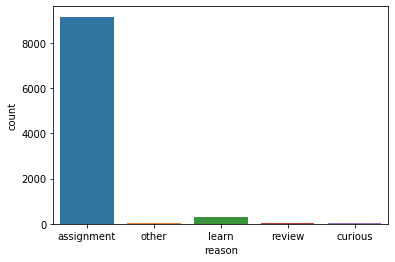

In [73]:
sns.countplot(x="reason", data=merged)

In [17]:
# Wondered average time each group (pass and failling groups) spent

print(merged_fail['testDuration'].mean())
print(merged_pass['testDuration'].mean())
print(merged_fail['testDuration'].median())
print(merged_pass['testDuration'].median())

12.424111419208431
13.760008609556591
10.7
12.1


In [18]:
print(merged_fail[['ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'ave_integration']].mean())
print(merged_pass[['ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'ave_integration']].mean())

ave_quality_Satisfaction    3.798053
ave_authenticProblems       3.785522
ave_ALT                     3.688398
ave_activation              3.844047
ave_demonstration           3.798815
ave_application             3.977187
ave_integration             3.855054
dtype: float64
ave_quality_Satisfaction    3.955768
ave_authenticProblems       4.042330
ave_ALT                     3.892165
ave_activation              3.987229
ave_demonstration           3.940766
ave_application             4.208782
ave_integration             4.060410
dtype: float64


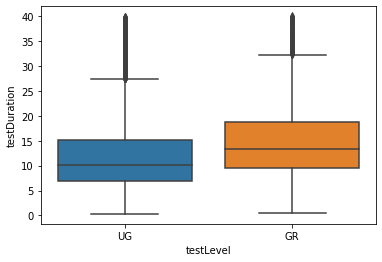

In [20]:
sns.boxplot(x='testLevel', y='testDuration', data=merged)

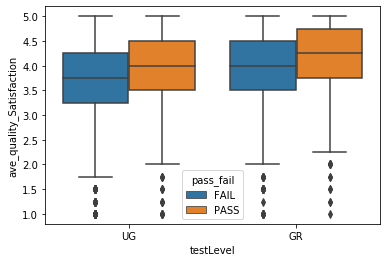

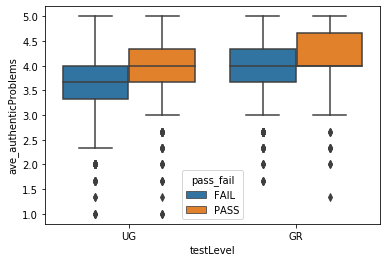

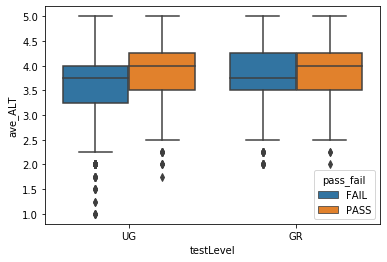

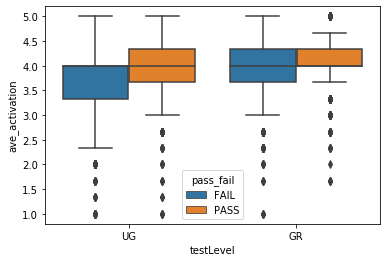

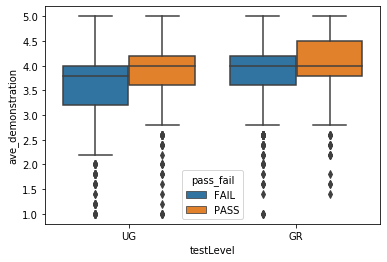

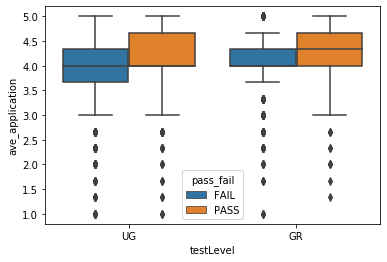

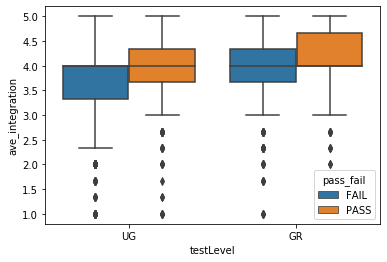

In [21]:
import matplotlib.pyplot as plt
a=['ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'ave_integration']
for b in a:
    plt.figure(b)
    sns.boxplot(x='testLevel', y=b, data=merged, hue='pass_fail')

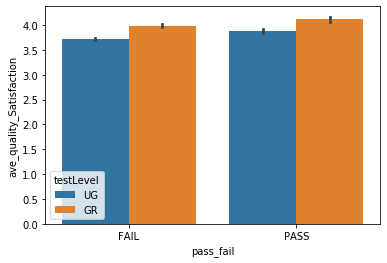

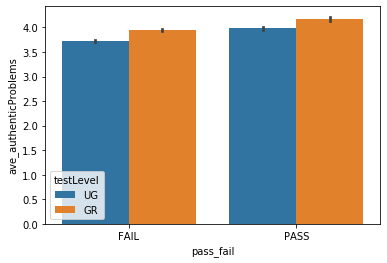

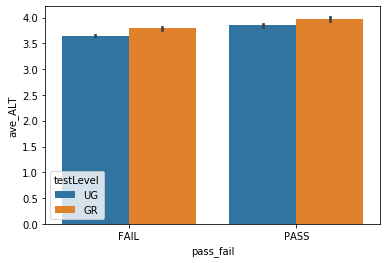

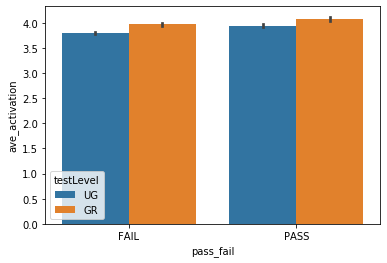

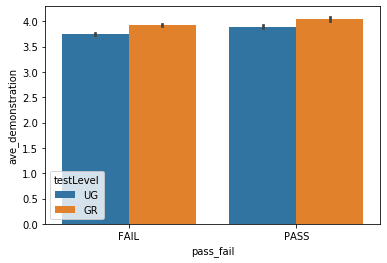

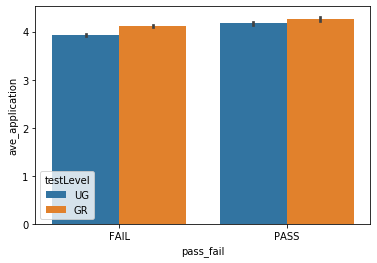

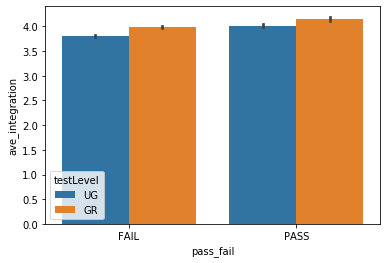

In [22]:
# Average 

import matplotlib.pyplot as plt
a=['ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'ave_integration']
for b in a:
    plt.figure(b)
    sns.barplot(x='pass_fail', y=b, hue='testLevel', data=merged)

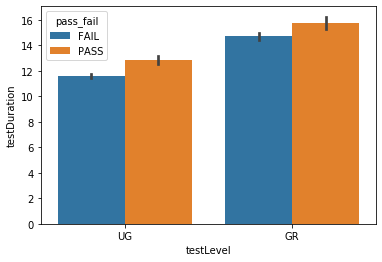

In [23]:
sns.barplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail')

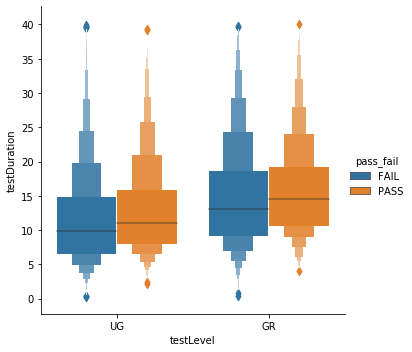

In [24]:
#A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:
sns.catplot(x='testLevel', y='testDuration', hue="pass_fail", kind="boxen", data=merged)

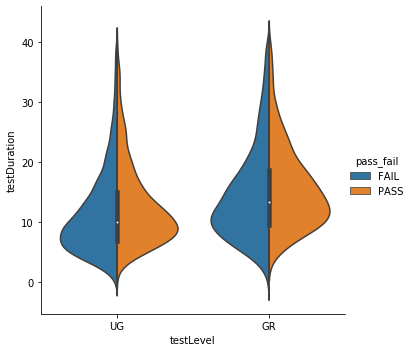

In [25]:
sns.catplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail',
            kind="violin", split=True)

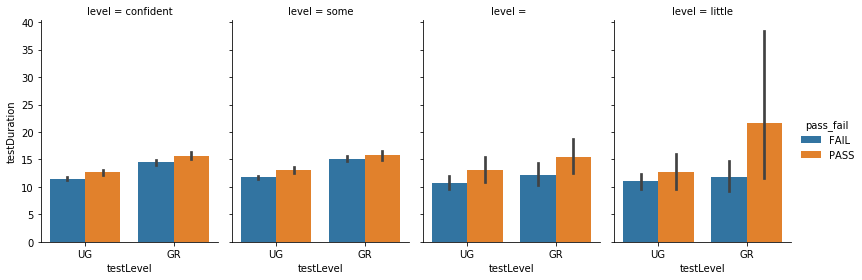

In [26]:
sns.catplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail', col='level',height=4, kind="bar",  aspect=.7);

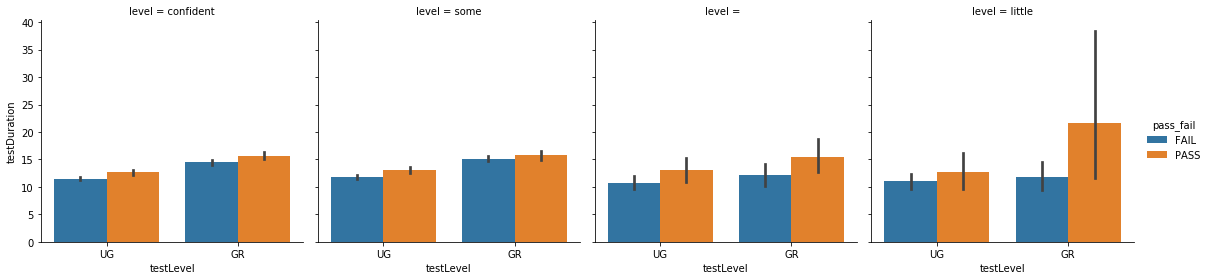

In [27]:
sns.catplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail', col='level',height=4, kind="bar",  aspect=1);

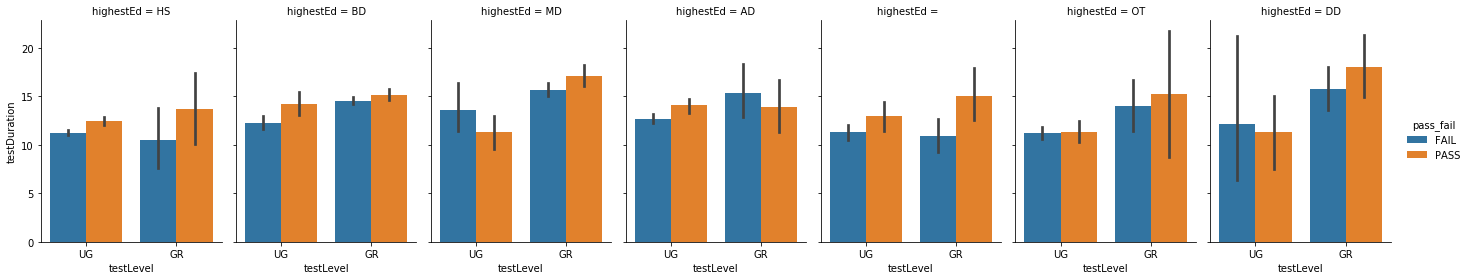

In [28]:
sns.catplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail', col='highestEd', kind="bar", height=4, aspect=.7);

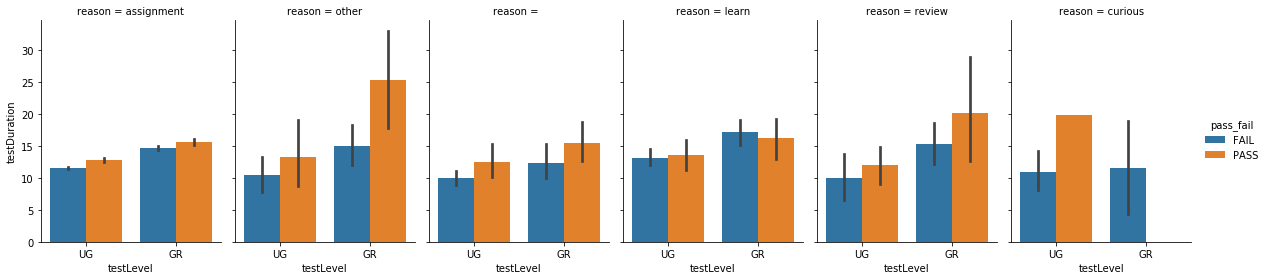

In [29]:
sns.catplot(x='testLevel', y='testDuration', data=merged, hue='pass_fail', col='reason', kind="bar", height=4, aspect=.7);

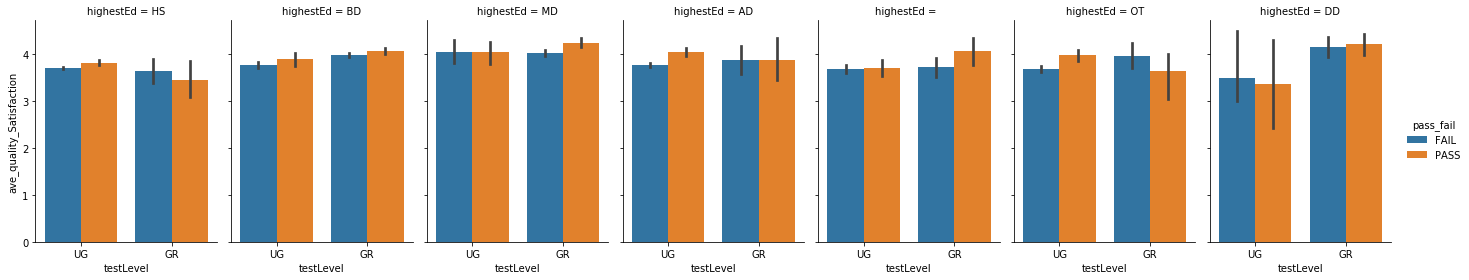

In [30]:
sns.catplot(x='testLevel', y='ave_quality_Satisfaction', data=merged, hue='pass_fail', col='highestEd', kind="bar", height=4, aspect=.7);

In [23]:
merged.columns

Index(['email', 'pass_fail', 'right_question', 'wrong_question', 'testID',
       'testTakenTime', 'testDuration', 'testLevel', 'taskCompleted',
       'viewedVideoCases', 'viewedDemVideos', 'integrationCompleted',
       'practiceTestTaken', 'quality_Satisfaction1', 'authenticProblems1',
       'demonstration1', 'application1', 'activation1', 'ALT2', 'ALT3',
       'quality_Satisfaction2', 'demonstration2', 'demonstration3', 'ALT4',
       'authenticProblems2', 'integration1', 'activation2',
       'authenticProblems3', 'integration2', 'application3', 'integration3',
       'activation3', 'application4', 'demonstration5', 'comments',
       'ALT1Reversed', 'demonstration4Reversed',
       'quality_Satisfaction3Reversed', 'quality_Satisfaction4Reversed', 'age',
       'highestEd', 'degreeOther', 'reason', 'reasonOther', 'level',
       'ave_quality_Satisfaction', 'ave_authenticProblems', 'ave_ALT',
       'ave_activation', 'ave_demonstration', 'ave_application',
       'ave_integration

In [44]:
merged[['right_question','ave_quality_Satisfaction','ave_authenticProblems','ave_ALT','ave_activation','ave_demonstration','ave_application','ave_integration']].corr()

,right_question,ave_quality_Satisfaction,ave_authenticProblems,ave_ALT,ave_activation,ave_demonstration,ave_application,ave_integration
right_question,1.000000,0.125142,0.235231,0.192479,0.135172,0.128501,0.217410,0.185752
ave_quality_Satisfaction,0.125142,1.000000,0.509278,0.483414,0.710629,0.747261,0.653853,0.657542
ave_authenticProblems,0.235231,0.509278,1.000000,0.547849,0.634942,0.587696,0.632692,0.633498
ave_ALT,0.192479,0.483414,0.547849,1.000000,0.550827,0.538151,0.525987,0.566686
ave_activation,0.135172,0.710629,0.634942,0.550827,1.000000,0.767680,0.739991,0.774002
ave_demonstration,0.128501,0.747261,0.587696,0.538151,0.767680,1.000000,0.726270,0.715577
ave_application,0.217410,0.653853,0.632692,0.525987,0.739991,0.726270,1.000000,0.728021
ave_integration,0.185752,0.657542,0.633498,0.566686,0.774002,0.715577,0.728021,1.000000


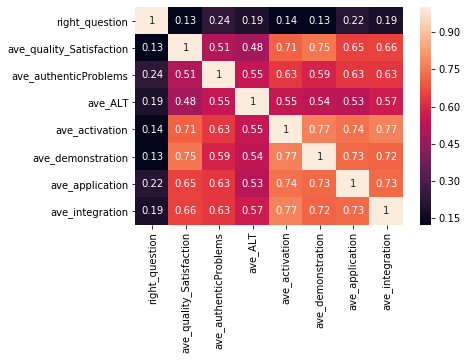

In [43]:
# plot the heatmap
corr=merged[['right_question','ave_quality_Satisfaction','ave_authenticProblems','ave_ALT','ave_activation','ave_demonstration','ave_application','ave_integration']].corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)